In [212]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

In [32]:
%pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 38.8 MB/s eta 0:00:00 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 47.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [397]:
df = pd.read_csv("CCRI.csv")
df.head()

,Community name,% of people aged >65 and < 5 years old,% Visible minority population,% Aboriginal identity,% one parent families,% Living alone,% Women,% Newcomers to community (Mobility Status - movers from 2015-2016),% Recent immigrant (2011-2016) and non permanent residents,% Language (neither FR or EN),"% Low education (No certificate, diploma or degree)","% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",% Low income and aged 65+,% Unemployed,Public transit access,% Area of tree canopy (2020),% paved area,High income households,Resident count
0,01B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.024415,0.260229,NaN,0.0
1,01C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.089814,0.166706,NaN,0.0
2,01F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.031109,0.133990,85.0,0.0
3,01H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.059726,0.019455,NaN,0.0
4,01I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.209101,0.000043,NaN,0.0


In [398]:
canopy_data = gpd.read_file("Tree_canopy.geojson")
canopy_data = canopy_data[["name","2020","geometry"]]
canopy_data

,name,2020,geometry
0,12I,4.26,"POLYGON ((-113.94716 50.86311, -113.94563 50.8..."
1,SETON,1.25,"POLYGON ((-113.92931 50.87049, -113.92922 50.8..."
2,RANGEVIEW,0.43,"POLYGON ((-113.93383 50.88507, -113.93363 50.8..."
3,12J,1.33,"POLYGON ((-113.85991 50.85775, -113.86006 50.8..."
4,AUBURN BAY,3.61,"POLYGON ((-113.96582 50.88044, -113.97371 50.8..."
...,...,...,...
297,CARRINGTON,0.48,"POLYGON ((-114.08295 51.18334, -114.07130 51.1..."
298,GLACIER RIDGE,1.00,"POLYGON ((-114.16460 51.19689, -114.16460 51.1..."
299,02K,0.58,"POLYGON ((-114.18768 51.18335, -114.18772 51.1..."
300,AMBLETON,0.01,"POLYGON ((-114.11790 51.18315, -114.11790 51.1..."


In [399]:
df.columns

Index(['Community name', '% of people aged >65 and < 5 years old',
       '% Visible minority population', '% Aboriginal identity',
       '% one parent families', '% Living alone', '% Women',
       '% Newcomers to community (Mobility Status - movers from 2015-2016)',
       '% Recent immigrant (2011-2016) and non permanent residents',
       '% Language (neither FR or EN)',
       '% Low education (No certificate, diploma or degree)',
       '% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+',
       '% Low income and aged 65+', '% Unemployed', 'Public transit access',
       '% Area of tree canopy (2020)', '% paved area',
       'High income households', 'Resident count'],
      dtype='object')

In [400]:
columns = [
    "Community name",
    "% of people aged >65 and < 5 years old",
    "% Visible minority population",
    "% Language (neither FR or EN)",
    "% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",
    "% Unemployed",
    "% Area of tree canopy (2020)"
]
columns

['Community name',
 '% of people aged >65 and < 5 years old',
 '% Visible minority population',
 '% Language (neither FR or EN)',
 '% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+',
 '% Unemployed',
 '% Area of tree canopy (2020)']

In [401]:
df = df[columns]
df

,Community name,% of people aged >65 and < 5 years old,% Visible minority population,% Language (neither FR or EN),"% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+",% Unemployed,% Area of tree canopy (2020)
0,01B,NaN,NaN,NaN,NaN,NaN,0.024415
1,01C,NaN,NaN,NaN,NaN,NaN,0.089814
2,01F,NaN,NaN,NaN,NaN,NaN,0.031109
3,01H,NaN,NaN,NaN,NaN,NaN,0.059726
4,01I,NaN,NaN,NaN,NaN,NaN,0.209101
...,...,...,...,...,...,...,...
304,WINSTON HEIGHTS/MOUNTVIEW,0.201926,0.191197,0.011004,0.088033,0.057772,0.001687
305,WOLF WILLOW,NaN,NaN,NaN,NaN,NaN,0.025626
306,WOODBINE,0.223325,0.195127,0.006203,0.040605,0.063727,0.050538
307,WOODLANDS,0.242086,0.194935,0.007498,0.069144,0.068311,0.067530


In [402]:
rename={
     "Community name":"name",
    "% of people aged >65 and < 5 years old":"age",
    "% Visible minority population":"visible_minority",
    "% Language (neither FR or EN)":"language",
    "% Low income (Based on the Low-income measure, after-tax (LIM-AT)) aged 18+":"low_income",
    "% Unemployed":"unemployed",
    "% Area of tree canopy (2020)":"canopy"
}

In [403]:
df = df.rename(columns=rename)

In [404]:
df = df.dropna()
df.head()

,name,age,visible_minority,language,low_income,unemployed,canopy
45,ABBEYDALE,0.149068,0.466678,0.031056,0.074702,0.065469,0.033019
46,ACADIA,0.230798,0.207224,0.013783,0.091730,0.071293,0.051684
47,ALBERT PARK/RADISSON HEIGHTS,0.171645,0.447335,0.017150,0.113620,0.076461,0.032291
49,ALTADORE,0.145203,0.115961,0.002161,0.051858,0.043215,0.069671
52,APPLEWOOD PARK,0.155135,0.700473,0.065177,0.058731,0.055150,0.019549


In [405]:
canopy_data= canopy_data.merge(df, left_on='name', right_on='name')

In [406]:
canopy_data.head(20)

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy
0,AUBURN BAY,3.61,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791
1,MAHOGANY,1.24,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275
2,COPPERFIELD,3.68,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343
3,NEW BRIGHTON,3.70,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369
4,SILVERADO,4.53,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195
5,CHAPARRAL,6.49,"POLYGON ((-114.00984 50.89085, -114.00771 50.8...",0.131105,0.195195,0.007903,0.028845,0.055318,0.017936
6,SUNDANCE,17.74,"POLYGON ((-114.03489 50.90774, -114.03435 50.9...",0.175329,0.159203,0.008217,0.035949,0.068817,0.039613
7,MIDNAPORE,25.67,"POLYGON ((-114.06010 50.92125, -114.05915 50.9...",0.286107,0.125172,0.006190,0.069464,0.050894,0.057322
8,PARKLAND,44.74,"POLYGON ((-114.01735 50.91360, -114.01736 50.9...",0.286612,0.050546,0.000000,0.028689,0.040984,0.065696
9,LAKE BONAVISTA,19.77,"POLYGON ((-114.05382 50.94822, -114.04196 50.9...",0.280676,0.094239,0.004858,0.029632,0.046148,0.058536


<Axes: >

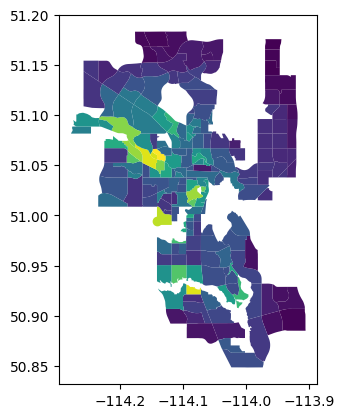

In [407]:
canopy_data.plot(column="2020")

In [408]:
canopy_data["2020"] = canopy_data["2020"]/100
canopy_data

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.148804,0.205316,0.007099,0.024706,0.032657,0.010791
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.132822,0.250669,0.010490,0.024235,0.048470,0.007343
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.132107,0.327024,0.011829,0.026711,0.044265,0.012369
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.136381,0.391901,0.027433,0.031352,0.049641,0.014195
...,...,...,...,...,...,...,...,...,...
191,ROYAL OAK,0.0848,"POLYGON ((-114.22769 51.13116, -114.22777 51.1...",0.141637,0.426277,0.023065,0.043140,0.052110,0.024893
192,ROCKY RIDGE,0.1295,"POLYGON ((-114.23420 51.15412, -114.23422 51.1...",0.189331,0.329840,0.010717,0.048226,0.063110,0.037118
193,CITADEL,0.1194,"POLYGON ((-114.16455 51.14286, -114.16476 51.1...",0.140716,0.436142,0.020343,0.048626,0.067977,0.025746
194,NOLAN HILL,0.0181,"POLYGON ((-114.15187 51.16802, -114.15213 51.1...",0.138175,0.309793,0.009327,0.013324,0.028648,0.005524


In [409]:
canopy_data["canopy_diff"] = (0.16-canopy_data["2020"]).clip(lower=0)

In [410]:
canopy_data.sort_values(by='canopy_diff', ascending=False).head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff
159,CITYSCAPE,0.0036,"POLYGON ((-113.95250 51.14699, -113.94675 51.1...",0.150129,0.515464,0.035438,0.051546,0.027384,0.001423,0.1564
161,REDSTONE,0.0063,"POLYGON ((-113.94637 51.16826, -113.94637 51.1...",0.166382,0.340287,0.023940,0.013680,0.029925,0.002513,0.1537
160,SKYVIEW RANCH,0.0108,"POLYGON ((-113.94675 51.15430, -113.94675 51.1...",0.153754,0.553088,0.035022,0.032032,0.041001,0.003644,0.1492
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.171504,0.183724,0.009335,0.012729,0.027155,0.004275,0.1476
194,NOLAN HILL,0.0181,"POLYGON ((-114.15187 51.16802, -114.15213 51.1...",0.138175,0.309793,0.009327,0.013324,0.028648,0.005524,0.1419


In [411]:
numeric_columns=[
    "age",
    "visible_minority",
    "language",
    "low_income",
    "unemployed"
]

In [412]:
scaler = MinMaxScaler()
canopy_data[numeric_columns] = scaler.fit_transform(canopy_data[numeric_columns])

In [413]:
canopy_data.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.224745,0.212864,0.042787,0.129891,0.143199,0.010791,0.1239
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.281338,0.190478,0.056259,0.066923,0.089764,0.004275,0.1476
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.184898,0.259885,0.063220,0.127414,0.296768,0.007343,0.1232
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.183116,0.339047,0.071293,0.140434,0.255927,0.012369,0.1230
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.193772,0.406309,0.165334,0.164832,0.308139,0.014195,0.1147


In [414]:
def priority_index(x):
    return 0.1 + (1-.1)*((x["age"]+x["visible_minority"]+x["language"]+x["low_income"]+x["unemployed"])/5)

In [415]:
canopy_data["priority"]=canopy_data.apply(priority_index, axis=1)

In [416]:
canopy_data.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,priority
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.224745,0.212864,0.042787,0.129891,0.143199,0.010791,0.1239,0.235628
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.281338,0.190478,0.056259,0.066923,0.089764,0.004275,0.1476,0.223257
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.184898,0.259885,0.063220,0.127414,0.296768,0.007343,0.1232,0.267793
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.183116,0.339047,0.071293,0.140434,0.255927,0.012369,0.1230,0.278167
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.193772,0.406309,0.165334,0.164832,0.308139,0.014195,0.1147,0.322910


In [417]:
canopy_data["canopy_score"] = (canopy_data["canopy_diff"]/canopy_data["canopy_diff"].max())

In [418]:
canopy_data.head()

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,priority,canopy_score
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.224745,0.212864,0.042787,0.129891,0.143199,0.010791,0.1239,0.235628,0.792199
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.281338,0.190478,0.056259,0.066923,0.089764,0.004275,0.1476,0.223257,0.943734
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.184898,0.259885,0.063220,0.127414,0.296768,0.007343,0.1232,0.267793,0.787724
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.183116,0.339047,0.071293,0.140434,0.255927,0.012369,0.1230,0.278167,0.786445
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.193772,0.406309,0.165334,0.164832,0.308139,0.014195,0.1147,0.322910,0.733376


In [419]:
def equity_index(x):
    return (1-(x["canopy_score"]*x["priority"]))*100


In [420]:
canopy_data["index"] = canopy_data.apply(equity_index, axis=1)

In [421]:
canopy_data

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,priority,canopy_score,index
0,AUBURN BAY,0.0361,"POLYGON ((-113.96582 50.88044, -113.97371 50.8...",0.224745,0.212864,0.042787,0.129891,0.143199,0.010791,0.1239,0.235628,0.792199,81.333592
1,MAHOGANY,0.0124,"POLYGON ((-113.92718 50.90680, -113.90702 50.9...",0.281338,0.190478,0.056259,0.066923,0.089764,0.004275,0.1476,0.223257,0.943734,78.930463
2,COPPERFIELD,0.0368,"POLYGON ((-113.90702 50.90683, -113.92718 50.9...",0.184898,0.259885,0.063220,0.127414,0.296768,0.007343,0.1232,0.267793,0.787724,78.905271
3,NEW BRIGHTON,0.0370,"POLYGON ((-113.94939 50.92873, -113.94675 50.9...",0.183116,0.339047,0.071293,0.140434,0.255927,0.012369,0.1230,0.278167,0.786445,78.123676
4,SILVERADO,0.0453,"POLYGON ((-114.06369 50.89258, -114.05439 50.8...",0.193772,0.406309,0.165334,0.164832,0.308139,0.014195,0.1147,0.322910,0.733376,76.318585
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,ROYAL OAK,0.0848,"POLYGON ((-114.22769 51.13116, -114.22777 51.1...",0.206875,0.441949,0.139009,0.226808,0.332121,0.024893,0.0752,0.342417,0.480818,83.535955
192,ROCKY RIDGE,0.1295,"POLYGON ((-114.23420 51.15412, -114.23422 51.1...",0.325784,0.341967,0.064589,0.253544,0.438954,0.037118,0.0305,0.356471,0.195013,93.048363
193,CITADEL,0.1194,"POLYGON ((-114.16455 51.14286, -114.16476 51.1...",0.204580,0.452176,0.122606,0.255646,0.486215,0.025746,0.0406,0.373820,0.259591,90.295967
194,NOLAN HILL,0.0181,"POLYGON ((-114.15187 51.16802, -114.15213 51.1...",0.198243,0.321183,0.056213,0.070053,0.104255,0.005524,0.1419,0.234990,0.907289,78.679577


In [422]:
# scaler = MinMaxScaler()
# df['index_norm'] = scaler.fit_transform(df['index'].values.reshape(-1,1))
# df["index_norm"] = df['index_norm']*100

In [432]:
canopy_data.sort_values(by='index', ascending=True).tail(50)

,name,2020,geometry,age,visible_minority,language,low_income,unemployed,canopy,canopy_diff,priority,canopy_score,index
33,RAMSAY,0.2076,"POLYGON ((-114.03702 51.03933, -114.03590 51.0...",0.235004,0.144129,0.027928,0.487252,0.546100,0.062390,0.0,0.359274,0.0,100.0
34,BELTLINE,0.2831,"POLYGON ((-114.04590 51.04032, -114.04595 51.0...",0.077480,0.267144,0.079146,0.570120,0.328460,0.012791,0.0,0.338023,0.0,100.0
35,DOWNTOWN EAST VILLAGE,0.1932,"POLYGON ((-114.05483 51.05039, -114.05479 51.0...",0.341753,0.173105,0.100628,0.533442,0.025610,0.022191,0.0,0.311417,0.0,100.0
37,DOVER,0.1917,"POLYGON ((-113.96432 51.03049, -113.96413 51.0...",0.400027,0.279449,0.171763,0.614579,0.440592,0.048087,0.0,0.443154,0.0,100.0
38,INGLEWOOD,0.3291,"POLYGON ((-114.03675 51.04398, -114.03671 51.0...",0.236648,0.122382,0.022466,0.509544,0.405272,0.076798,0.0,0.333336,0.0,100.0
39,SOUTHVIEW,0.1626,"POLYGON ((-113.98161 51.03647, -113.98161 51.0...",0.472554,0.206779,0.150253,0.626233,0.633117,0.055233,0.0,0.476008,0.0,100.0
25,MAPLE RIDGE,0.2662,"POLYGON ((-114.02395 50.96344, -114.02400 50.9...",0.519983,0.048700,0.000000,0.137199,0.231541,0.044953,0.0,0.268736,0.0,100.0
24,WILLOW PARK,0.1947,"POLYGON ((-114.04196 50.94823, -114.05382 50.9...",0.517285,0.185832,0.022623,0.266425,0.400217,0.067997,0.0,0.350629,0.0,100.0
49,BRIDGELAND/RIVERSIDE,0.2298,"POLYGON ((-114.03745 51.05833, -114.03693 51.0...",0.465461,0.206291,0.092585,0.607664,0.195469,0.055519,0.0,0.382145,0.0,100.0
50,CHINATOWN,0.4519,"POLYGON ((-114.06007 51.05152, -114.06002 51.0...",0.609470,0.503488,1.000000,1.000000,0.061854,0.052715,0.0,0.671466,0.0,100.0


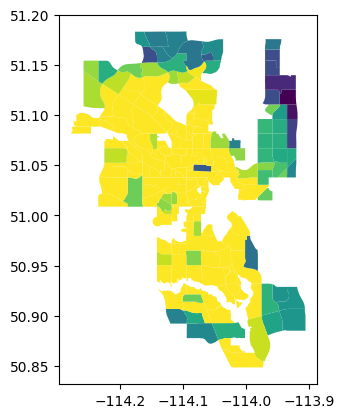

In [429]:
canopy_data.plot(column="index");

In [433]:
final_index = canopy_data[["geometry","name","priority", "canopy_score","index"]]

In [434]:
final_index .to_file("equity_index_3.geojson", driver="GeoJSON")  